In [78]:
import importlib
import os
import logging
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from params import Params
import params
importlib.reload(params)

import cache
importlib.reload(cache)


#logging.basicConfig(encoding='utf-8', level=logging.DEBUG)
import embeddings_base
importlib.reload(embeddings_base)

import rwkv_runner
importlib.reload(rwkv_runner)
from rwkv_runner import rwkv
importlib.reload(rwkv_runner)
from source_file_iterator import SourceFileIterator
import source_file_iterator
importlib.reload(source_file_iterator)

modelname = 'RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth'

os.environ["RWKV_CUDA_ON"] = '1'
r = rwkv(modelname,
         '20B_tokenizer.json',
         model_load=False)

iter = SourceFileIterator(r.data_top_dir, r.data_subdirs, r.numTokensList)
dfs = []
for out in iter:
    file = out[0][1]
    numTokens = out[1][1]
    with open(file, "rb") as f:
        emb = r.getHeadPersistenceDiagramEmbeddings(f, numTokens)
    df = pd.DataFrame(emb)
    dfs.append(df)
    #df['size']=0.01
dfs[0] # [2, n]のベクトル群から1次元に変換されている

embeddings_base_logger= <Logger embeddings_base (INFO)>
<class 'tokenizers.Tokenizer'>
tokenizer class= <class 'tokenizers.Tokenizer'>
key_prefix= rwkv:RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth:Tokenizer


,0
0,512.470542
1,545.003132
2,846.254542
3,1357.438486
4,1415.779834
5,1487.983252
6,3595.379032
7,5805.533942
8,7722.641003
9,104654.442219


- postfunc=identical
```
python3 rwkv_runner.py --rebuild-cache bottleneck
python3 rwkv_runner.py --rebuild-cache sim
            r = rwkv(model_name, tokenizer_name, model_load = False)           """
            embFunc = r.getHeadPersistenceDi.BottleneckSim]:
            for simFunc in [r.BottleneckSim]:
                for numTokens in r.numTokensList:
                    c = r.db.deleteCache("simmat", embFunc = embFunc,
                              simFunc = simFunc,
                              numTokens = numTokens)
                    matrix = r.simMat(embFunc, simFunc, numTokens)

```

In [7]:
iter = SourceFileIterator(r.data_top_dir, r.data_subdirs, r.numTokensList)
dfs = []
for out in iter:
    file = out[0][1]
    numTokens = out[1][1]
    with open(file, "rb") as f:
        emb = r.getHeadPersistenceDiagramEmbeddings(f, numTokens)
    df = pd.DataFrame(emb)
    dfs.append(df)
pd.DataFrame(dfs[0]).describe()

,0
count,20.000000
mean,13273.326175
std,31519.883070
min,512.470542
25%,1333.445600
50%,2062.484739
75%,5971.558307
max,105543.211802


- identityだとこの値なので，sigmaを巨大に(1000)

[[1.         0.34833078 0.34833051 0.56697716 0.3483306  0.48764275
  0.63098652 0.23750988 0.16180119 0.34833081 0.32434522 0.57260731
  0.34833073 0.29311711 0.34833073]
 [0.34833067 1.         0.69717121 0.62134193 0.24856895 0.41101383
  0.28105785 0.23750984 0.16180128 0.55959541 0.32434507 0.45866399
  0.63761686 0.29311689 0.61652592]
 [0.34833067 0.6971709  1.         0.62134191 0.42627839 0.41101375
  0.50356811 0.23750959 0.2672998  0.6728501  0.32434484 0.59566914
  0.63761676 0.53376812 0.61652595]
 [0.56697721 0.62134192 0.62134199 1.         0.24856894 0.48764278
  0.28105749 0.23750943 0.16180126 0.55959558 0.32434472 0.45866409
  0.62134203 0.29311688 0.61652575]
 [0.34833067 0.24856878 0.4262784  0.2485689  1.         0.24856882
  0.28105779 0.23750938 0.36409751 0.42728084 0.27264259 0.59785044
  0.5046856  0.63499426 0.24856865]
 [0.48764307 0.41101378 0.41101405 0.48764285 0.24856892 1.
  0.48764272 0.23750959 0.3640974  0.41101413 0.41101398 0.45866411
  0.41101383

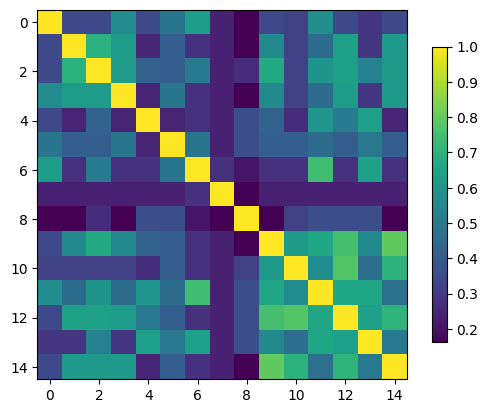

In [8]:
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

embFunc = r.getHeadPersistenceDiagramEmbeddings
simFunc = r.BottleneckSim
numTokens=1024
#c = r.db.deleteCache("simmat", embFunc=embFunc, simFunc=simFunc, numTokens=numTokens)
# jupyterからプーリングができないので，コマンドラインでキャッシュを作ってから確認すること
matrix=r.simMat(embFunc, simFunc, numTokens)
print(matrix)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cax = ax.imshow(matrix, cmap="viridis", origin="upper")
cbar = fig.colorbar(cax, shrink=0.8)

- postfunc=normalize(sigma=0.025)
- rebuild-cache simはキャッシュを見ないので，bottleneckのrebuildはいらなかった
```
python3 rwkv_runner.py --rebuild-cache bottleneck
python3 rwkv_runner.py --rebuild-cache s

```im

In [9]:
iter = SourceFileIterator(r.data_top_dir, r.data_subdirs, r.numTokensList)
dfs = []
for out in iter:
    file = out[0][1]
    numTokens = out[1][1]
    with open(file, "rb") as f:
        emb = r.getHeadPersistenceDiagramEmbeddings(f, numTokens)
    df = pd.DataFrame(emb)
    dfs.append(df)
pd.DataFrame(dfs[0]).describe()

,0
count,20.000000
mean,13273.326175
std,31519.883070
min,512.470542
25%,1333.445600
50%,2062.484739
75%,5971.558307
max,105543.211802


[[1.         0.         0.90352284 0.8035861  0.         0.00660899
  0.02440067 0.33770785 0.37876455 0.00000055 0.00000047 0.03068484
  0.34199337 0.00001468 0.00004344]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.90352284 0.         1.         0.8035861  0.         0.00660899
  0.02440067 0.33770785 0.37876455 0.00000055 0.00000047 0.03068484
  0.34199337 0.00001468 0.00004344]
 [0.8035861  0.         0.8035861  1.         0.         0.00660899
  0.02440067 0.33770785 0.37876455 0.00000055 0.00000047 0.03068484
  0.34199337 0.00001468 0.00004344]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.00000013 0.         0.
  0.         0.         0.        ]
 [0.00660899 0.         0.00660899 0.00660899 0.         1.
  0.00660899 0.00660899 0.00660899 0.00000055 0.00000047 0.01520511
  0.00660899 0.00001468 0.00004344]
 [0.0244

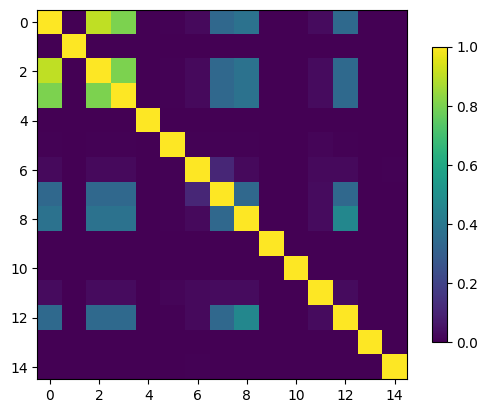

In [21]:
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

embFunc = r.getHeadPersistenceDiagramEmbeddings
simFunc = r.BottleneckSim
numTokens=1024
#c = r.db.deleteCache("simmat", embFunc=embFunc, simFunc=simFunc, numTokens=numTokens)
# jupyterからプーリングができないので，コマンドラインでキャッシュを作ってから確認すること
matrix=r.simMat(embFunc, simFunc, numTokens)
print(matrix)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cax = ax.imshow(matrix, cmap="viridis", origin="upper")
cbar = fig.colorbar(cax, shrink=0.8)

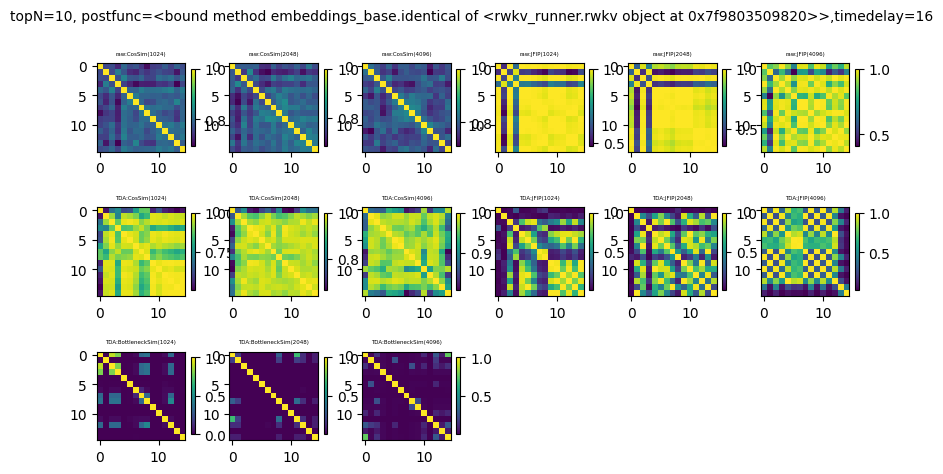

In [22]:
r.all_simMatrixPlot()

In [23]:
r.getAllScores()

[0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.36,
 0.44,
 0.3511111111111111,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.6177777777777778,
 0.52,
 0.5377777777777778,
 0.76,
 0.7244444444444444,
 0.7244444444444444]

[[1.         0.65714238 0.20628235 0.00951303 0.00809191 0.01863765
  0.18075879 0.0109493  0.74119561 0.00933509 0.07296893 0.91075186
  0.60178204 0.0319345  0.53724353]
 [0.65714238 1.         0.20628235 0.00951303 0.00809191 0.01863765
  0.18075879 0.0109493  0.65714238 0.00933509 0.07296893 0.65714238
  0.60178204 0.0319345  0.53724353]
 [0.20628235 0.20628235 1.         0.00951303 0.00809191 0.01863765
  0.20628235 0.0109493  0.20628235 0.00933509 0.07296893 0.21365254
  0.21614491 0.0319345  0.20628235]
 [0.00951303 0.00951303 0.00951303 1.         0.1008526  0.16605892
  0.00951303 0.16416231 0.00951303 0.01088039 0.00951303 0.00951303
  0.00951303 0.00951303 0.00951303]
 [0.00809191 0.00809191 0.00809191 0.1008526  1.         0.00809191
  0.00809191 0.14940281 0.00809191 0.00809191 0.00809191 0.00809191
  0.00809191 0.00809191 0.00809191]
 [0.01863765 0.01863765 0.01863765 0.16605892 0.00809191 1.
  0.01863765 0.01287897 0.01863765 0.01088039 0.01863765 0.01863765
  0.01863765

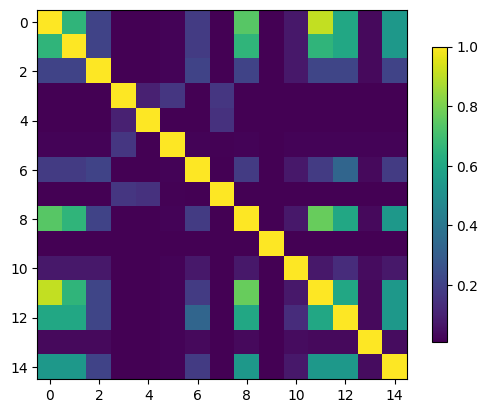

In [20]:
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

embFunc = r.getHeadPersistenceDiagramEmbeddings
simFunc = r.BottleneckSim
numTokens=2048
#c = r.db.deleteCache("simmat", embFunc=embFunc, simFunc=simFunc, numTokens=numTokens)
# jupyterからプーリングができないので，コマンドラインでキャッシュを作ってから確認すること
matrix=r.simMat(embFunc, simFunc, numTokens)
print(matrix)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cax = ax.imshow(matrix, cmap="viridis", origin="upper")
cbar = fig.colorbar(cax, shrink=0.8)

- postfunc=scaling=100,sigma=100
- po
- rebuild-cache simはキャッシュを見ないので，bottleneckのrebuildはいらなかった→念のため両方やったほうが安全そう
```
python3 rwkv_runner.py --rebuild-cache bottleneck
python3 rwkv_runner.py --rebuild-cache sim

```

[[1.         0.99092889 0.98954255 0.99092888 0.97609045 0.98881303
  0.98565388 0.9285672  0.9422237  0.98881304 0.97609046 0.99092888
  0.99501248 0.93725487 0.99092889]
 [0.99092889 1.         0.98805936 0.99820162 0.97609047 0.98393051
  0.98211192 0.92856716 0.94222372 0.98881303 0.97609045 0.99282585
  0.99092888 0.93725483 0.99639401]
 [0.98954255 0.98805936 1.         0.98805935 0.98116708 0.99092889
  0.99549766 0.94222374 0.94222368 0.99282585 0.97609045 0.99158559
  0.98805936 0.93725488 0.99282586]
 [0.99092888 0.99820162 0.98805935 1.         0.97609047 0.97819132
  0.98211191 0.92856716 0.94222365 0.98881304 0.97609045 0.99282585
  0.99092888 0.93725483 0.99639401]
 [0.97609044 0.97609045 0.98116708 0.97609044 1.         0.99092889
  0.9781913  0.92856716 0.94222368 0.98116708 0.97609045 0.98116708
  0.98211192 0.93725488 0.9811671 ]
 [0.98881303 0.98393049 0.99092888 0.97819129 0.99092888 1.
  0.99024785 0.92856722 0.94222368 0.98211192 0.97609045 0.98019865
  0.9856539 

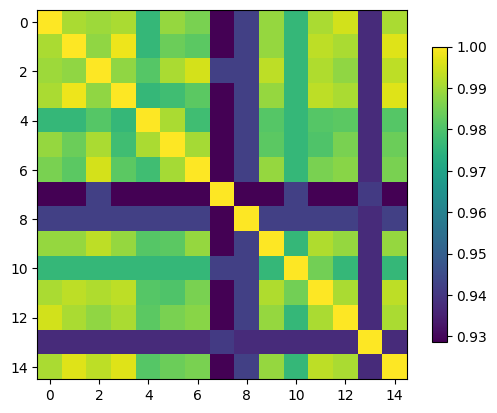

In [28]:
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

embFunc = r.getHeadPersistenceDiagramEmbeddings
simFunc = r.BottleneckSim
numTokens=2048
#c = r.db.deleteCache("simmat", embFunc=embFunc, simFunc=simFunc, numTokens=numTokens)
# jupyterからプーリングができないので，コマンドラインでキャッシュを作ってから確認すること
matrix=r.simMat(embFunc, simFunc, numTokens)
print(matrix)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cax = ax.imshow(matrix, cmap="viridis", origin="upper")
cbar = fig.colorbar(cax, shrink=0.8)

- postfuncの効果確認

In [36]:
iter = SourceFileIterator(r.data_top_dir, r.data_subdirs, r.numTokensList)
dfs = []
for out in iter:
    file = out[0][1]
    numTokens = out[1][1]
    with open(file, "rb") as f:
        emb = r.getHeadPersistenceDiagramEmbeddings(f, numTokens)
    emb = emb.reshape(-1, 2)
    df = pd.DataFrame(emb)
    dfs.append(df)
pd.DataFrame(dfs[0]).describe()

,0,1
count,10.000000,10.000000
mean,3417.649201,23129.003150
std,3353.268998,43246.927260
min,512.470542,545.003132
25%,1300.045164,1390.074677
50%,1786.469447,2102.869635
75%,4365.569853,6303.607037
max,10627.261093,105543.211802


In [41]:
p = r.scaling(dfs[0])

In [42]:
p.describe()

,0,1
count,10.000000,10.000000
mean,170.500000,1156.100000
std,167.732095,2162.297978
min,25.000000,27.000000
25%,64.750000,68.750000
50%,89.000000,105.000000
75%,218.000000,314.750000
max,531.000000,5277.000000


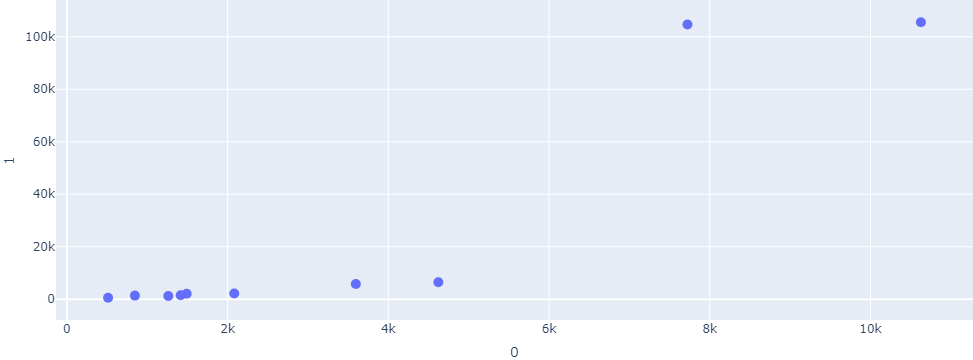

In [40]:
fig = px.scatter(dfs[0], x=0, y=1, 
                
                   )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), width=400)
fig.update_traces(marker_size=10)
#fig.update_xaxes(range=[-12,12],  scaleratio=1,)
#fig.update_yaxes(range=[-12,12],  scaleratio=1,)
fig.show()

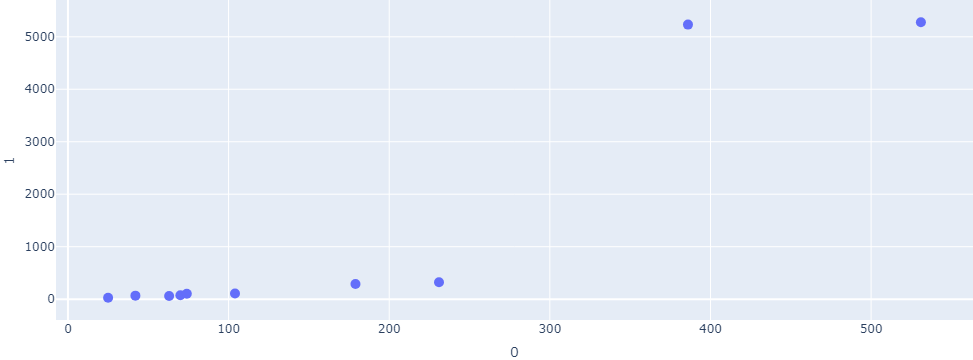

In [43]:
fig = px.scatter(p, x=0, y=1, 
                
                   )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), width=400)
fig.update_traces(marker_size=10)
#fig.update_xaxes(range=[-12,12],  scaleratio=1,)
#fig.update_yaxes(range=[-12,12],  scaleratio=1,)
fig.show()

- 本命はidentical, sigma=1000

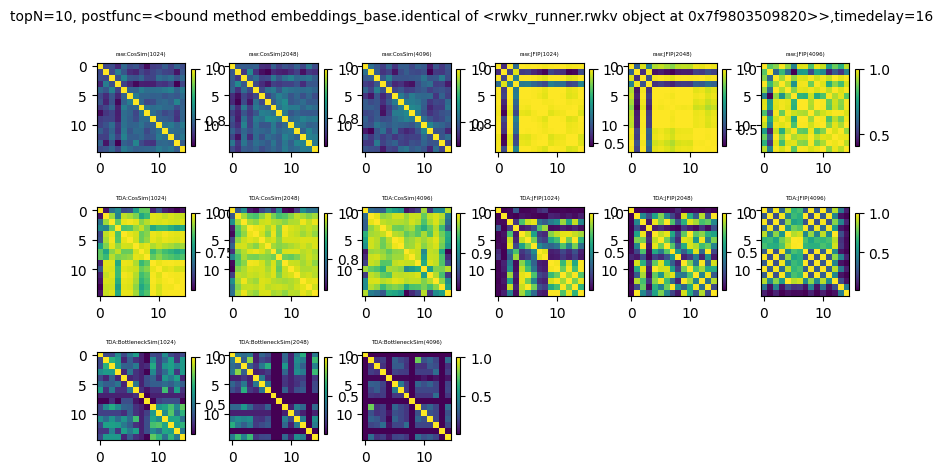

In [44]:
r.all_simMatrixPlot()

In [100]:
pd.DataFrame(np.array(r.getAllScores()).reshape(5, 3), index=["rwkv+CosSim", "rwkv+JFIP", "TDA+CosSim", "TDA+JFIP", "TDA+Bottleneck"], columns=[1024, 2048, 4096])


,1024,2048,4096
rwkv+CosSim,0.214286,0.214286,0.214286
rwkv+JFIP,0.228571,0.271429,0.223810
TDA+CosSim,0.214286,0.214286,0.214286
TDA+JFIP,0.366667,0.314286,0.323810
TDA+Bottleneck,0.366667,0.409524,0.423810


In [86]:
simMat=r.simMat(r.getRwkvEmbeddings, r.CosSim, 1024)
n = simMat.shape[0]
score = 0
for i in range(n):
    for j in range(n):
        hit = r.hit(i, j, simMat)
        print(i, j, hit)
        score += hit
score/(n*n-n)


0 0 1
0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
0 6 0
0 7 0
0 8 0
0 9 0
0 10 0
0 11 0
0 12 0
0 13 0
0 14 0
1 0 1
1 1 1
1 2 0
1 3 0
1 4 0
1 5 0
1 6 0
1 7 0
1 8 0
1 9 0
1 10 0
1 11 0
1 12 0
1 13 0
1 14 0
2 0 1
2 1 1
2 2 1
2 3 0
2 4 0
2 5 0
2 6 0
2 7 0
2 8 0
2 9 0
2 10 0
2 11 0
2 12 0
2 13 0
2 14 0
3 0 1
3 1 1
3 2 1
3 3 1
3 4 0
3 5 0
3 6 0
3 7 0
3 8 0
3 9 0
3 10 0
3 11 0
3 12 0
3 13 0
3 14 0
4 0 1
4 1 1
4 2 1
4 3 1
4 4 1
4 5 0
4 6 0
4 7 0
4 8 0
4 9 0
4 10 0
4 11 0
4 12 0
4 13 0
4 14 0
5 0 0
5 1 0
5 2 0
5 3 0
5 4 0
5 5 1
5 6 0
5 7 0
5 8 0
5 9 0
5 10 0
5 11 0
5 12 0
5 13 0
5 14 0
6 0 0
6 1 0
6 2 0
6 3 0
6 4 0
6 5 1
6 6 1
6 7 0
6 8 0
6 9 0
6 10 0
6 11 0
6 12 0
6 13 0
6 14 0
7 0 0
7 1 0
7 2 0
7 3 0
7 4 0
7 5 1
7 6 1
7 7 1
7 8 0
7 9 0
7 10 0
7 11 0
7 12 0
7 13 0
7 14 0
8 0 0
8 1 0
8 2 0
8 3 0
8 4 0
8 5 1
8 6 1
8 7 1
8 8 1
8 9 0
8 10 0
8 11 0
8 12 0
8 13 0
8 14 0
9 0 0
9 1 0
9 2 0
9 3 0
9 4 0
9 5 1
9 6 1
9 7 1
9 8 1
9 9 1
9 10 0
9 11 0
9 12 0
9 13 0
9 14 0
10 0 0
10 1 0
10 2 0
10 3 0
10 4 0
10 5 0
10 6 0
1

0.21428571428571427

In [89]:
simMat=r.simMat(r.getHeadPersistenceDiagramEmbeddings, r.BottleneckSim, 4096)
n = simMat.shape[0]
score = 0
for i in range(n):
    for j in range(n):
        hit = r.hit(i, j, simMat)
        print(i, j, hit)
        score += hit
score/(n*n-n)

0 0 1
0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
0 6 0
0 7 0
0 8 0
0 9 0
0 10 0
0 11 0
0 12 0
0 13 0
0 14 0
1 0 0
1 1 1
1 2 0
1 3 0
1 4 0
1 5 0
1 6 0
1 7 0
1 8 0
1 9 0
1 10 0
1 11 0
1 12 0
1 13 0
1 14 0
2 0 0
2 1 0
2 2 1
2 3 0
2 4 0
2 5 0
2 6 0
2 7 0
2 8 0
2 9 0
2 10 0
2 11 0
2 12 0
2 13 0
2 14 0
3 0 0
3 1 0
3 2 0
3 3 1
3 4 0
3 5 0
3 6 0
3 7 0
3 8 0
3 9 0
3 10 0
3 11 0
3 12 0
3 13 0
3 14 0
4 0 0
4 1 0
4 2 0
4 3 0
4 4 1
4 5 0
4 6 0
4 7 0
4 8 0
4 9 0
4 10 0
4 11 0
4 12 0
4 13 0
4 14 0
5 0 1
5 1 1
5 2 1
5 3 1
5 4 1
5 5 1
5 6 0
5 7 0
5 8 0
5 9 0
5 10 0
5 11 0
5 12 0
5 13 0
5 14 0
6 0 1
6 1 1
6 2 1
6 3 1
6 4 1
6 5 0
6 6 1
6 7 0
6 8 0
6 9 0
6 10 0
6 11 0
6 12 0
6 13 0
6 14 0
7 0 1
7 1 1
7 2 1
7 3 1
7 4 1
7 5 0
7 6 0
7 7 1
7 8 0
7 9 0
7 10 0
7 11 0
7 12 0
7 13 0
7 14 0
8 0 1
8 1 1
8 2 1
8 3 1
8 4 1
8 5 0
8 6 0
8 7 0
8 8 1
8 9 0
8 10 0
8 11 0
8 12 0
8 13 0
8 14 0
9 0 1
9 1 0
9 2 1
9 3 1
9 4 1
9 5 0
9 6 0
9 7 0
9 8 0
9 9 1
9 10 0
9 11 0
9 12 0
9 13 0
9 14 0
10 0 1
10 1 1
10 2 1
10 3 1
10 4 1
10 5 1
10 6 1
1

0.4238095238095238

- postfunc=identical(sigma=0.05)

```
python3 rwkv_runner.py --rebuild-cache bottleneck
python3 rwkv_runner.py --rebuild-cache sim

```

[[1.         0.40474628 0.35215017 0.40474644 0.08850025 0.32709196
  0.24218038 0.00060902 0.002526   0.3320229  0.08664021 0.40474603
  0.62565561 0.0014207  0.40474629]
 [0.40474645 1.         0.30072074 0.8251991  0.0885003  0.21963128
  0.16846192 0.00060902 0.00252599 0.33202292 0.08664021 0.49088026
  0.41565477 0.0014207  0.68227875]
 [0.35215072 0.30072116 1.         0.30072081 0.15861616 0.40083275
  0.63273    0.00265115 0.00252601 0.52890734 0.08664022 0.45114371
  0.30072114 0.0014207  0.43602969]
 [0.40474643 0.8251991  0.3007212  1.         0.0885001  0.11191129
  0.16846172 0.00060902 0.00252598 0.33202252 0.08664    0.49088068
  0.41565517 0.0014207  0.68227883]
 [0.08850028 0.08850034 0.15861598 0.08850011 1.         0.40155939
  0.11065866 0.00060902 0.002526   0.15861609 0.08664022 0.15861613
  0.17594982 0.0014207  0.15861585]
 [0.32709208 0.21963121 0.4008324  0.11191148 0.40155941 1.
  0.38733169 0.00060902 0.002526   0.14997725 0.08664022 0.14642096
  0.22852247

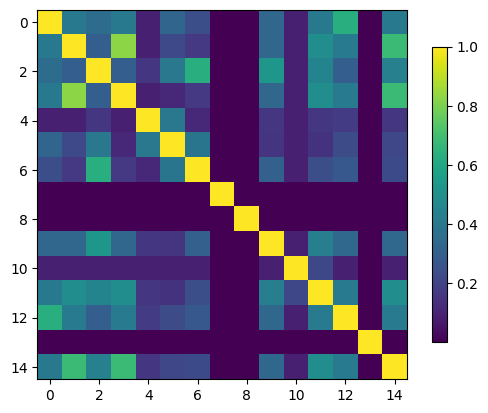

In [46]:
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

embFunc = r.getHeadPersistenceDiagramEmbeddings
simFunc = r.BottleneckSim
numTokens=2048
#c = r.db.deleteCache("simmat", embFunc=embFunc, simFunc=simFunc, numTokens=numTokens)
# jupyterからプーリングができないので，コマンドラインでキャッシュを作ってから確認すること
matrix=r.simMat(embFunc, simFunc, numTokens)
print(matrix)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cax = ax.imshow(matrix, cmap="viridis", origin="upper")
cbar = fig.colorbar(cax, shrink=0.8)

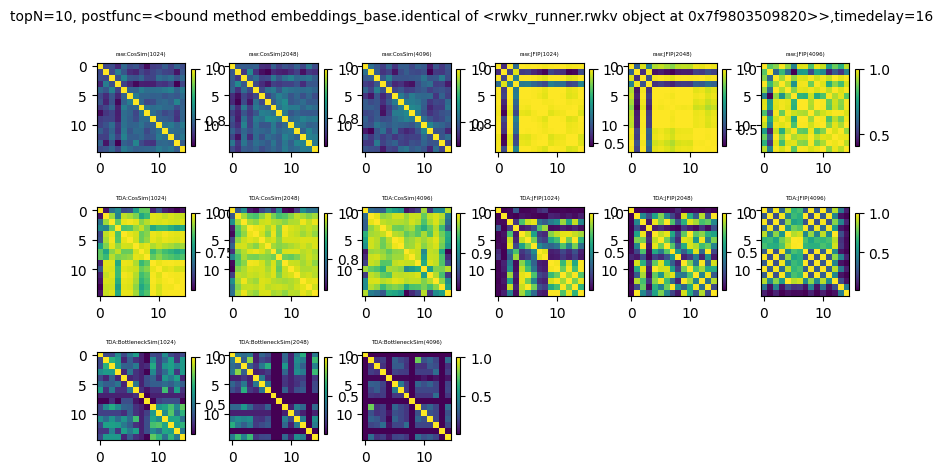

In [48]:
r.all_simMatrixPlot() # topN=10, delay=16

- --rebuild-cache sim-all

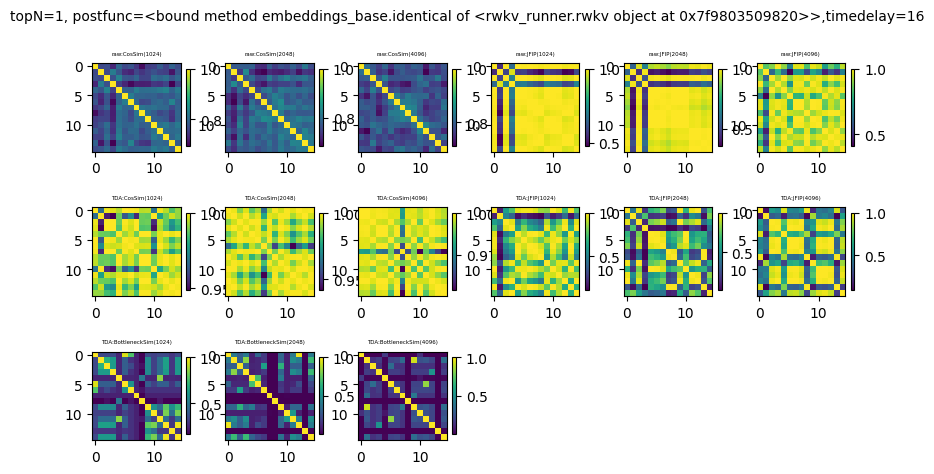

In [51]:
r.topN=1, delay=16
r.all_simMatrixPlot() 

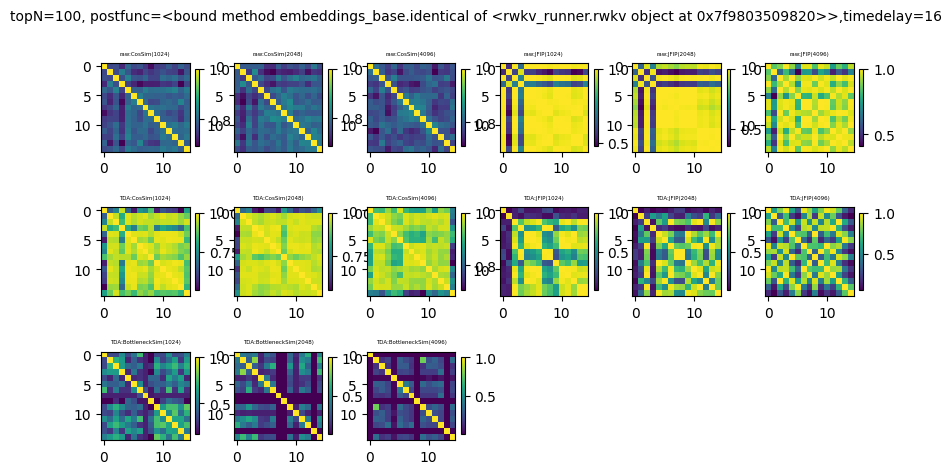

In [52]:
r.topN=100, delay=16
r.all_simMatrixPlot() 

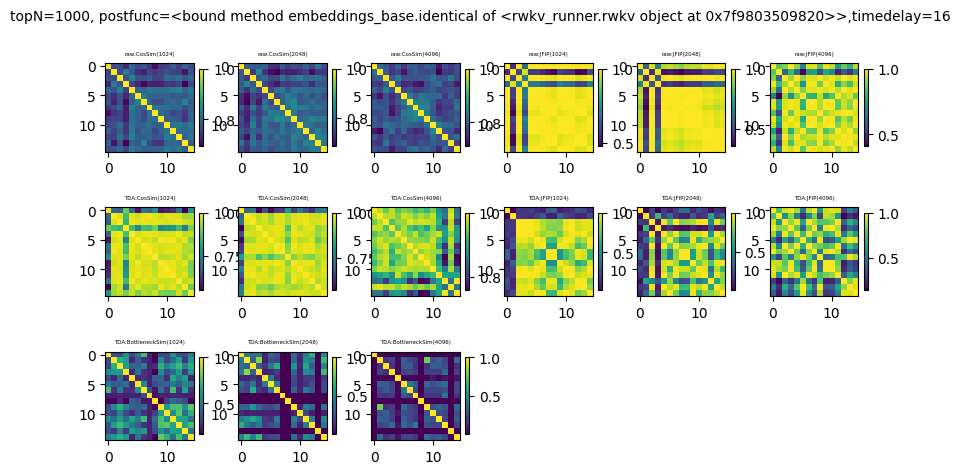

In [53]:
r.topN=1000, delay=16
r.all_simMatrixPlot() 

In [57]:
r.getAllScores(cache=True)

PicklingError: Can't pickle <class 'rwkv_runner.rwkv'>: it's not the same object as rwkv_runner.rwkv

<Figure size 640x480 with 0 Axes>